<b></b>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OrdinalEncoder
import matplotlib as pt
import numpy as np
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [3]:
print(df.dtypes)
print('---------------------------------------------------------------------------')
print(df['Gender'].head(10))

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object
---------------------------------------------------------------------------
0    Female
1    Female
2    Female
3    Female
4    Female
5      Male
6      Male
7    Female
8      Male
9      Male
Name: Gender, dtype: object


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
#df['Tenure'] = df['Tenure'].astype('Int64')

In [8]:
df = df.dropna(subset=['Tenure'])

In [9]:
df.drop(columns=['Surname', 'Geography'], inplace=True)

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
data_ohe = pd.get_dummies(df, drop_first=True)

In [12]:
data_ohe.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Gender_Male'],
      dtype='object')

In [13]:
print(data_ohe.head(5))

   RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0          1    15634602          619   42     2.0       0.00              1   
1          2    15647311          608   41     1.0   83807.86              1   
2          3    15619304          502   42     8.0  159660.80              3   
3          4    15701354          699   39     1.0       0.00              2   
4          5    15737888          850   43     2.0  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Gender_Male  
0          1               1        101348.88       1            0  
1          0               1        112542.58       0            0  
2          1               0        113931.57       1            0  
3          0               0         93826.63       0            0  
4          1               1         79084.10       0            0  


In [14]:
data_ohe.isna().sum()

RowNumber          0
CustomerId         0
CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Gender_Male        0
dtype: int64

In [15]:
data_ohe.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
count,9091.000000,9.091000e+03,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,5013.909911,1.569105e+07,650.736553,38.949181,4.997690,76522.740015,1.530195,0.704983,0.515565,100181.214924,0.203938,0.547135
std,2884.433466,7.161419e+04,96.410471,10.555581,2.894723,62329.528576,0.581003,0.456076,0.499785,57624.755647,0.402946,0.497801
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000
25%,2521.500000,1.562899e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51227.745000,0.000000,0.000000
50%,5019.000000,1.569106e+07,652.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100240.200000,0.000000,1.000000
75%,7511.500000,1.575285e+07,717.000000,44.000000,7.000000,127561.890000,2.000000,1.000000,1.000000,149567.210000,0.000000,1.000000
max,9999.000000,1.581566e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000


In [16]:
#target = data_ohe['Exited']
#features = data_ohe.drop('Exited', axis=1)


#target_train, features_train, target_rest, features_rest= train_test_split(target,features, test_size=0.40, random_state=12345)
#target_valid, features_valid, target_test, features_test = train_test_split(target_rest, features_rest, test_size=0.50, random_state=12345)

In [17]:
train, rest= train_test_split(data_ohe, test_size=0.40, random_state=12345)
valid, test = train_test_split(rest, test_size=0.50, random_state=12345)

features_train = train.drop(columns=['Exited'])
target_train = train['Exited']
features_valid = valid.drop(columns=['Exited'])
target_valid = valid['Exited']
features_test = test.drop(columns=['Exited'])
target_test = test['Exited']

In [18]:
#features_train= features_train.values.reshape(-1, 1)
#target_train = target_train.values.reshape(-1, 1)

In [19]:

#stats.describe(features_train)


In [20]:
'''
best_model = None
best_result = 0
for est in range(10, 50):
    for depth in range(10, 50):
        model_rforest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rforest.fit(features_train, target_train)
        result = model_rforest.score(features_valid, target_valid) 
        predictions_valid = model_rforest.predict(features_valid)
        if result > best_result:
            best_model = model_rforest
            best_result = result
            print(est)
            print(depth)
            print(best_result)
            print('-----------------')
'''

"\nbest_model = None\nbest_result = 0\nfor est in range(10, 50):\n    for depth in range(10, 50):\n        model_rforest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)\n        model_rforest.fit(features_train, target_train)\n        result = model_rforest.score(features_valid, target_valid) \n        predictions_valid = model_rforest.predict(features_valid)\n        if result > best_result:\n            best_model = model_rforest\n            best_result = result\n            print(est)\n            print(depth)\n            print(best_result)\n            print('-----------------')\n"

In [21]:
model_lr = LogisticRegression(solver='liblinear', random_state=12345)
model_lr.fit(features_train, target_train) 
model_lr.predict(features_valid)
model_lr.score(features_valid, target_valid)

0.7926292629262927

## Исследование задачи

<b>СДЕЛАЕМ ПРОВЕРКУ НА АДЕКВАТНОСТЬ МОДЕЛИ</b>

0    0.796062
1    0.203938
Name: Exited, dtype: float64


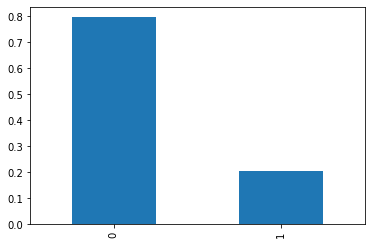

In [22]:
#смотрим целевой признак
class_frequency = df['Exited'].value_counts(normalize= True)
print(class_frequency)
class_frequency.plot(kind='bar')

<b></b>

<b>ПРОАНАЛИЗИРУЕМ ЧАСТОТЫ КЛАССОВ В РЕЗУЛЬТАТЕ ПРЕДСКАЗАНИЙ</b>

0    0.888889
1    0.111111
dtype: float64


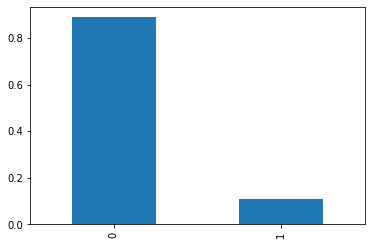

In [23]:
#посмотрим на модель, которая показала лучший результат на валидационной выборке
model_rforest_2 = RandomForestClassifier(random_state=12345, n_estimators=38, max_depth=11)
model_rforest_2.fit(features_train, target_train)
predictions_valid = model_rforest_2.predict(features_valid)
result = model_rforest_2.score(features_valid, target_valid)
# чтобы работала функция value_counts(),
# мы преобразовали результат к pd.Series 
predicted_valid = pd.Series(model_rforest_2.predict(features_valid))

class_frequency = predicted_valid.value_counts(normalize= True)
print(class_frequency)
class_frequency.plot(kind='bar')

## Борьба с дисбалансом

<b>ПОСЧИТАЕМ МАТРИЦУ ОШИБОК</b>

In [24]:
print(confusion_matrix(target_valid, predicted_valid))

[[1404   37]
 [ 212  165]]


<b></b>

<b>F1-МЕРА</b>

In [25]:
predicted_valid = model_rforest_2.predict(features_valid)
precision = precision_score(target_valid, predicted_valid)
recall = recall_score(target_valid, predicted_valid)
f1 = f1_score(target_valid, predicted_valid)
print("Полнота:", recall)
print("Точность:", precision)
print("F1-мера:", f1)

Полнота: 0.4376657824933687
Точность: 0.8168316831683168
F1-мера: 0.5699481865284974


<b></b>

<b>ПОПРОБУЕМ ВЗВЕСИТЬ КЛАССЫ</b>

In [26]:
model_rforest_3 = RandomForestClassifier(random_state=12345, n_estimators=38, max_depth=11, class_weight='balanced')
model_rforest_3.fit(features_train, target_train)
predictions_valid = model_rforest_3.predict(features_valid)
f1_2 = f1_score(target_valid, predictions_valid)
print("F1-мера:", f1_2)
#F1 увеличилось, но не намного

F1-мера: 0.5802968960863697


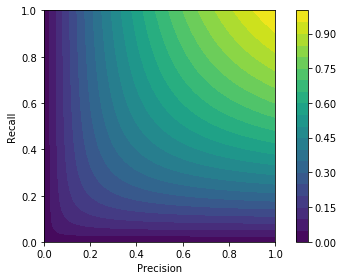

<b></b>

<b>НАЙДЕМ ЗНАЧЕНИЕ ВЕРОЯТНОСТЕЙ ДЛЯ КАЖДОГО КЛАССА МОДЕЛИ</b>

In [27]:
probabilities_valid = model_rforest_3.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:]
print(probabilities_one_valid[:10])

[[0.5114183  0.4885817 ]
 [0.8651857  0.1348143 ]
 [0.30474945 0.69525055]
 [0.74367224 0.25632776]
 [0.7973842  0.2026158 ]
 [0.96283038 0.03716962]
 [0.50273809 0.49726191]
 [0.9670709  0.0329291 ]
 [0.82545774 0.17454226]
 [0.96058428 0.03941572]]


<b></b>

<b>ПOСТРОИМ PR-КРИВУЮ ДЛЯ МОДЕЛИ </b>

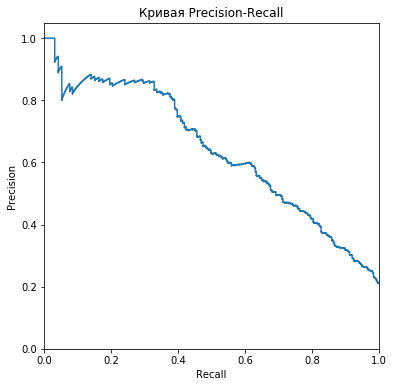

In [28]:
probabilities_valid = model_rforest_3.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

<b></b>

<b>ПОСТРОИМ ROC</b>

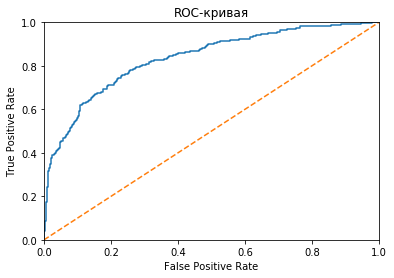

In [29]:
probabilities_one_valid_one = probabilities_valid[:,1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_one) 

plt.figure()

plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

<b></b>

In [30]:

probabilities_valid = model_rforest_3.predict_proba(features_valid)
probabilities_one_valid_one = probabilities_valid[:,1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid_one)

print(auc_roc)

0.8355198368359728


<b></b>

<b>УВЕЛИЧИМ ВЫБОРКУ ДЛЯ РЕДКОГО КЛАССА</b>

In [31]:
#разделим выборку
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones  = target_train[target_train == 1]

<b></b>

In [32]:
#увеличим выборку с target
target_upsampled = pd.concat([target_zeros] + [target_ones] * 5)
print(target_upsampled.shape)
print(target_train.shape)
print(target_valid.shape)

(9958,)
(5454,)
(1818,)


In [33]:
#увеличим выборку с features
features_upsampled = pd.concat([features_zeros] + [features_ones] * 5)
print(features_upsampled.shape)
print(features_train.shape)
print(features_valid.shape)

(9958, 11)
(5454, 11)
(1818, 11)


<b></b>

<b>ПЕРЕОБУЧИМ МОДЕЛЬ НА ИЗМЕНИВШИХСЯ ВЫБОРКАХ</b>

In [34]:
#C = np.array(features_downsampled).reshape(2,2)
#D = np.array(target_upsampled).reshape(2,2)
#C.dot(D)

In [35]:
#features_downsampled

In [36]:
#target_upsampled

In [37]:
model_rforest_4 = RandomForestClassifier(random_state=20052020, n_estimators=53, class_weight='balanced')
model_rforest_4.fit(features_upsampled, target_upsampled)
predictions_valid = model_rforest_4.predict(features_valid)
f1_3 = f1_score(target_valid, predictions_valid)
print("F1-мера:", f1_3)

F1-мера: 0.5772594752186588


In [38]:
model_rforest_4 = RandomForestClassifier(random_state=12345, n_estimators=38, max_depth=11, class_weight='balanced')
model_rforest_4.fit(features_upsampled, target_upsampled)
predictions_valid = model_rforest_4.predict(features_valid)
f1_3 = f1_score(target_valid, predictions_valid)
print("F1-мера:", f1_3)

F1-мера: 0.5956416464891041


<b></b>

<b>ПРОАНАЛИЗИРУЕМ ЧАСТОТЫ КЛАССОВ В РЕЗУЛЬТАТЕ ПРЕДСКАЗАНИЙ ДЛЯ НОВОЙ МОДЕЛИ</b>

0    0.753025
1    0.246975
dtype: float64


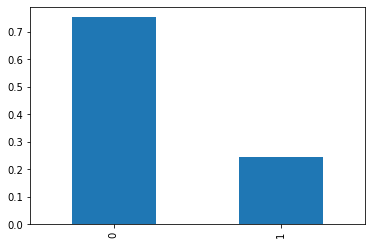

In [39]:
predicted_valid_2 = pd.Series(model_rforest_4.predict(features_valid))

class_frequency_2 = predicted_valid_2.value_counts(normalize= True)
print(class_frequency_2)
class_frequency_2.plot(kind='bar')

<b></b>

<b>НАЙДЕМ ЗНАЧЕНИЕ ВЕРОЯТНОСТЕЙ ДЛЯ КАЖДОГО КЛАССА НОВОЙ МОДЕЛИ</b>

In [40]:
probabilities_valid_2 = model_rforest_4.predict_proba(features_valid)
probabilities_one_valid_2 = probabilities_valid_2[:]
print(probabilities_one_valid_2[:10])

[[0.37409393 0.62590607]
 [0.84268979 0.15731021]
 [0.31761622 0.68238378]
 [0.64094003 0.35905997]
 [0.70787924 0.29212076]
 [0.95552133 0.04447867]
 [0.56744386 0.43255614]
 [0.9576616  0.0423384 ]
 [0.85162649 0.14837351]
 [0.9348808  0.0651192 ]]


<b></b>

<b>ПOСТРОИМ PR-КРИВУЮ ДЛЯ НОВОЙ МОДЕЛИ </b>

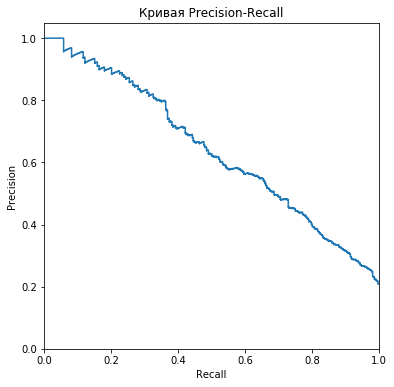

In [41]:
probabilities_valid = model_rforest_4.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

<b></b>

<b>ПОСТРОИМ ROC ДЛЯ НОВОЙ МОДЕЛИ</b>

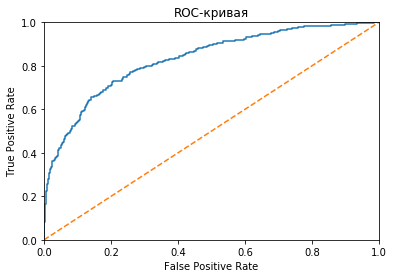

In [42]:
probabilities_one_valid_2_one = probabilities_valid_2[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_2_one) 

plt.figure()

plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

<b></b>

<b>ВЫЧИСЛИМ AUC-ROC ДЛЯ НОВОЙ МОДЕЛИ</b>

In [43]:

probabilities_valid_2 = model_rforest_4.predict_proba(features_valid)
probabilities_one_valid_2 = probabilities_valid_2[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid_2)

print(auc_roc)

0.8307614996217259


In [44]:
#for samples_leaf in range(1, 20):   
    #for samples_split in range(2, 20):
        #model_rforest_5 = RandomForestClassifier(random_state=12345, n_estimators=38, max_depth=11, class_weight='balanced',
                                                 #min_samples_split=samples_split, min_samples_leaf= samples_leaf)
        ##model =  RandomForestClassifier(random_state=20052020, n_estimators=estimator, min_samples_split=samples_split)
        #model_rforest_5.fit(features_upsampled, target_upsampled)
        #predicted_valid = model_rforest_5.predict(features_valid)
        #print('Samples_split', samples_split,'F1', f1_score(target_valid, predicted_valid))
        #print('Samples_leaf', samples_leaf,'F1', f1_score(target_valid, predicted_valid))
        #print('-------------------------------------------------------------------------------------------------')

<b></b>

## Тестирование модели

`теперь проделаем тоже самое для тестовой выборки с class_weight`

In [45]:
#расчитаем F1
features_test = test.drop(columns=['Exited'])
target_test = test['Exited']
model_rforest_5 = RandomForestClassifier(random_state=12345, n_estimators=38, max_depth=11, class_weight='balanced')
model_rforest_5.fit(features_upsampled, target_upsampled)
predictions_valid_5 = model_rforest_5.predict(features_test)
f1_4 = f1_score(target_test, predictions_valid_5)
print("F1-мера:", f1_4)

F1-мера: 0.577889447236181


In [46]:
model_rforest_5 = RandomForestClassifier(random_state=12345, n_estimators=40, max_depth=11, class_weight='balanced',
                                             min_samples_split=5, min_samples_leaf= 17, max_features=3, criterion='gini')
#model =  RandomForestClassifier(random_state=20052020, n_estimators=estimator, min_samples_split=samples_split)
model_rforest_5.fit(features_upsampled, target_upsampled)
predicted_valid = model_rforest_5.predict(features_test)
#print(max_f)
print('F1', f1_score(target_test, predicted_valid))
#print('-------------------------------------------------------------------------------------------------------')

F1 0.5810324129651862


<b></b>

0    0.735019
1    0.264981
dtype: float64


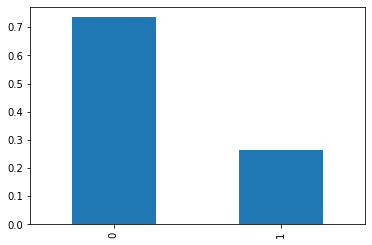

In [47]:
#ПРОАНАЛИЗИРУЕМ ЧАСТОТЫ КЛАССОВ

predicted_valid_3 = pd.Series(model_rforest_5.predict(features_test))

class_frequency_3 = predicted_valid_3.value_counts(normalize= True)
print(class_frequency_3)
class_frequency_3.plot(kind='bar')

<b></b>

In [48]:
#НАЙДЕМ ЗНАЧЕНИЕ ВЕРОЯТНОСТЕЙ ДЛЯ КАЖДОГО КЛАССА НОВОЙ МОДЕЛИ
probabilities_valid_3 = model_rforest_5.predict_proba(features_test)
probabilities_one_valid_3 = probabilities_valid_3[:]
print(probabilities_one_valid_3[:10])

[[0.87877292 0.12122708]
 [0.68966575 0.31033425]
 [0.60499258 0.39500742]
 [0.45823361 0.54176639]
 [0.58290866 0.41709134]
 [0.32967035 0.67032965]
 [0.68705514 0.31294486]
 [0.55650463 0.44349537]
 [0.94903126 0.05096874]
 [0.27431337 0.72568663]]


<b></b>

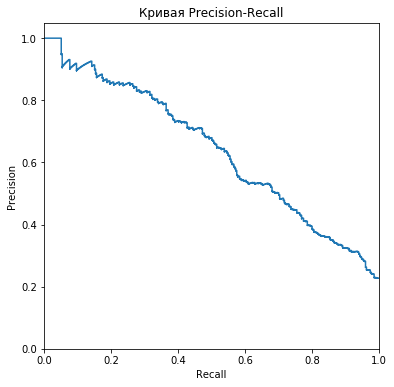

In [49]:
#ПOСТРОИМ RR-КРИВУЮ 
probabilities_valid = model_rforest_5.predict_proba(features_test)
precision, recall, thresholds = precision_recall_curve(target_test, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

<b></b>

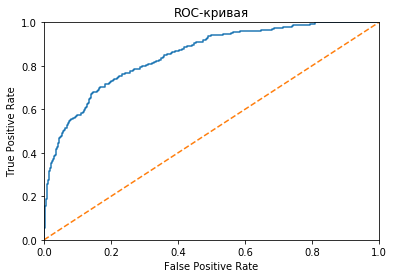

In [50]:
#ПОСТРОИМ ROC
probabilities_one_valid_3_one = probabilities_valid_3[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid_3_one) 

plt.figure()

plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

<b></b>

In [51]:
#ВЫЧИСЛИМ AUC-ROC
probabilities_valid_3 = model_rforest_5.predict_proba(features_test)
probabilities_one_valid_3_one = probabilities_valid_3[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_valid_3_one)

print(auc_roc)

0.8492881374352763


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*